In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install regionmask
!pip install cf_xarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 120.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 1.3 MB/s eta 0:00:00


In [ ]:
!pip install rioxarray cartopy geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 46.2 MB/s eta 0:00:00


In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


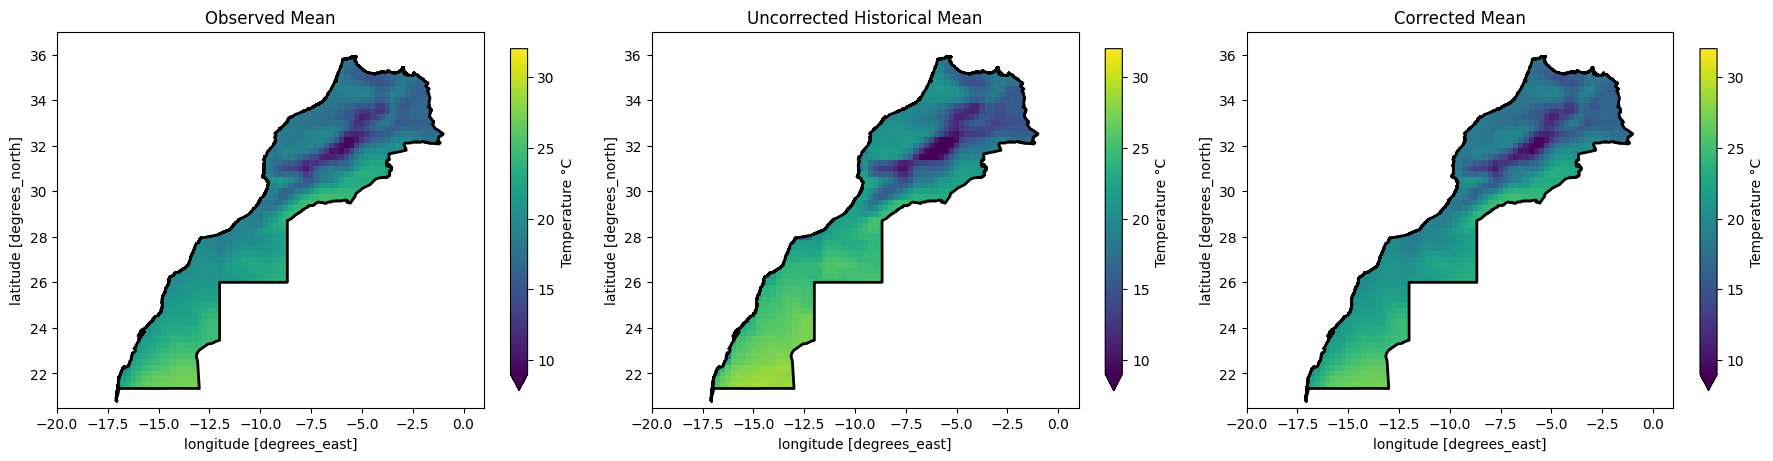

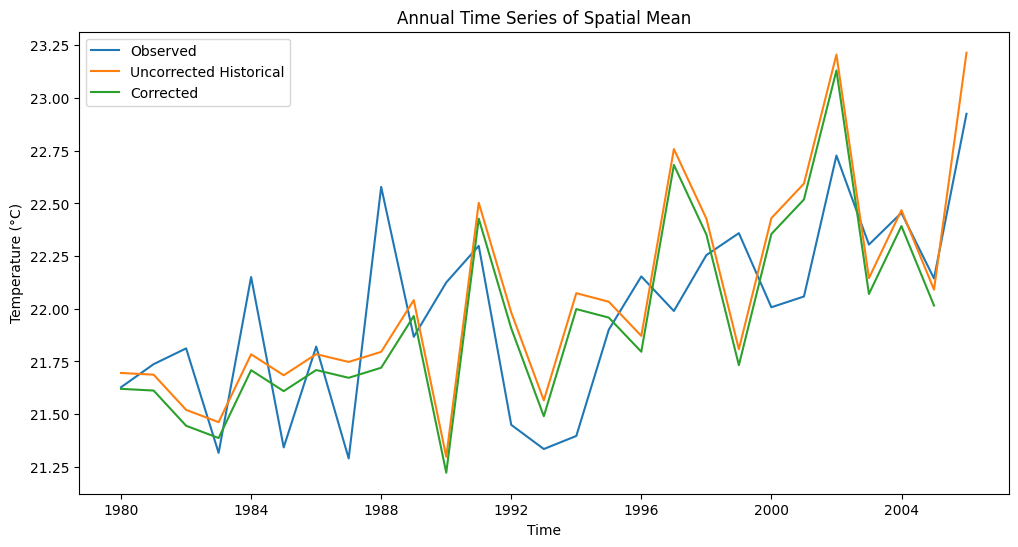

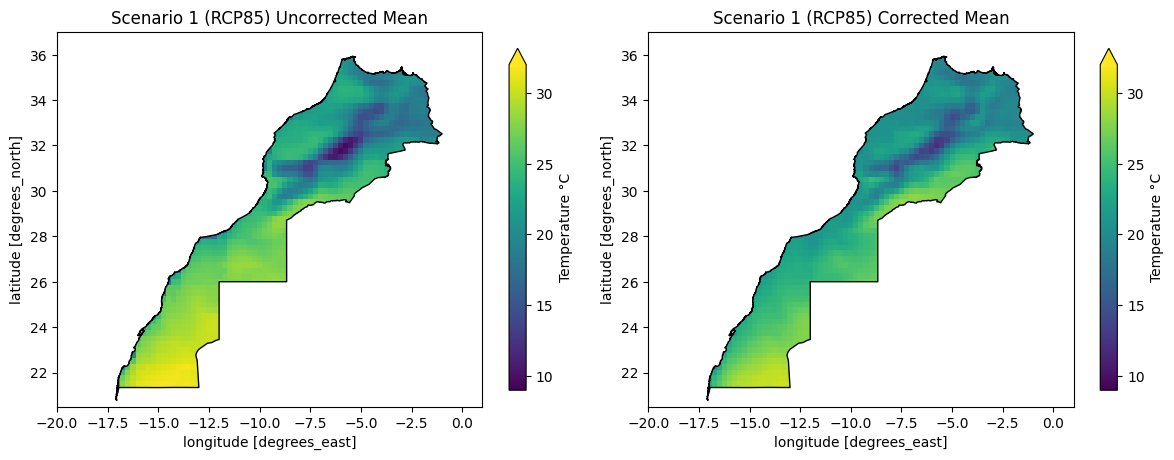

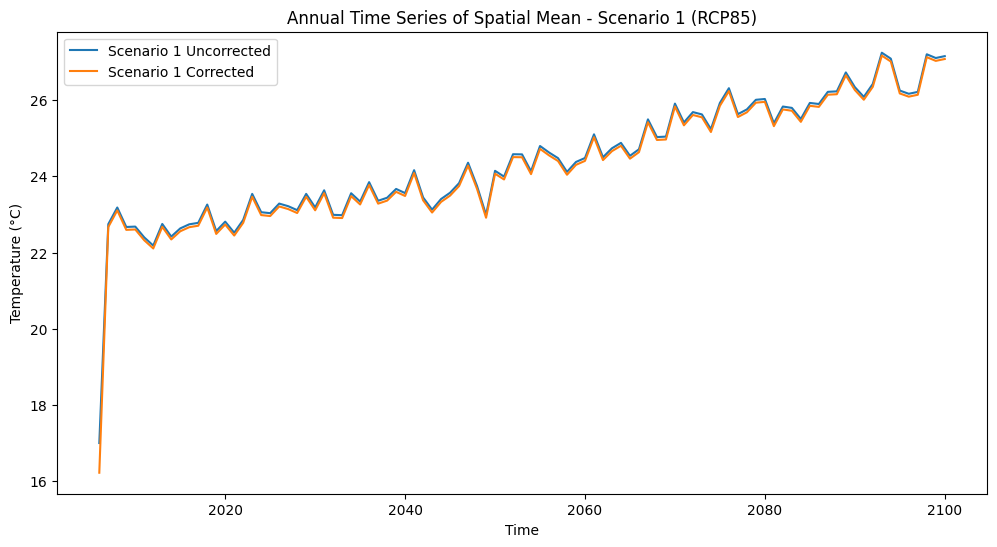

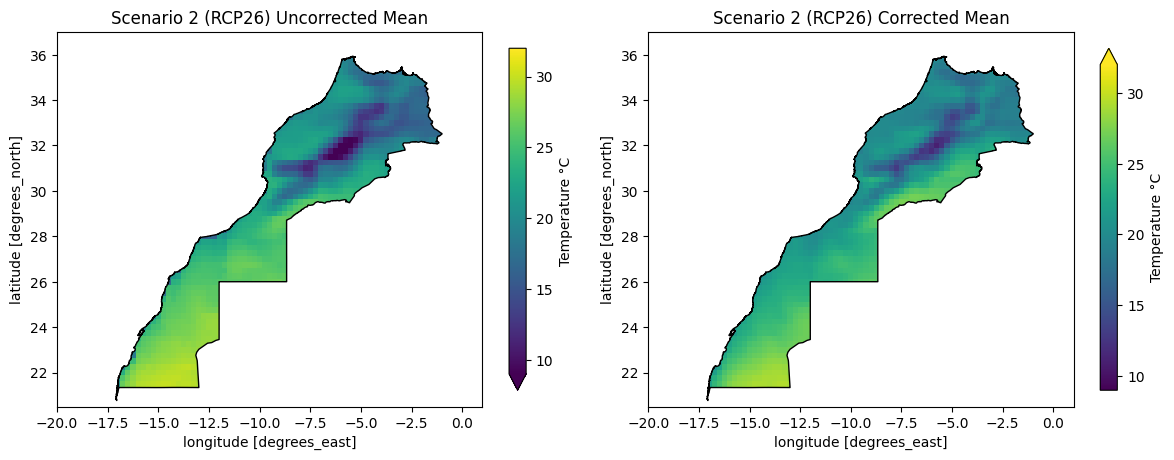

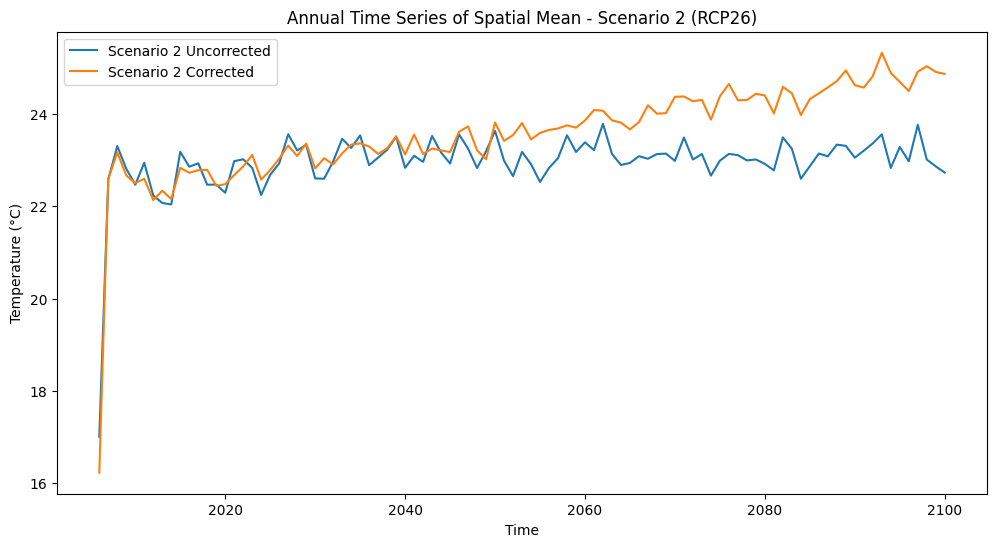

In [ ]:

import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load shapefiles for Morocco
shapefile_path = "drive/MyDrive/data/maroc/"
morocco = gpd.read_file(shapefile_path, crs='EPSG:4326')

# File paths for data
historical_file_temp = '/content/drive/MyDrive/data/MPI/temp/RF/tas_Morocco-22_MPI-M-MPI-ESM-MR_historical_r1i1p1_ICTP-RegCM4-7_v0_day_1970-2005.nc'
corrected_file_temp = '/content/drive/MyDrive/data/new/BC_control/BC_T2m_control_.nc'
observed_file_temp = '/content/drive/MyDrive/data/era5/era5_daily_2m_temperature_data_1979-2023.nc'
scenario1_file_temp = '/content/drive/MyDrive/data/MPI/temp/RCP85/tas_Morocco-22_MPI-M-MPI-ESM-MR_rcp85_r1i1p1_ICTP-RegCM4-7_v0_day_2005-2100.nc'
scenario1_corrected_file_temp = '/content/drive/MyDrive/data/new/BC_RCP85/BC_T2m_RCP85_.nc'
scenario2_file_temp = '/content/drive/MyDrive/data/MPI/temp/RCP26/tas_Morocco-22_MPI-M-MPI-ESM-MR_rcp26_r1i1p1_ICTP-RegCM4-7_v0_day_2005-2100.nc'
scenario2_corrected_file_temp = '/content/drive/MyDrive/data/new/BC_RCP26/BC_T2m_RCP26_.nc'

# Load datasets
historical_data_temp = xr.open_dataset(historical_file_temp)
corrected_data_temp = xr.open_dataset(corrected_file_temp)
observed_data_temp = xr.open_dataset(observed_file_temp)
scenario1_data_temp = xr.open_dataset(scenario1_file_temp)
scenario1_corrected_data_temp = xr.open_dataset(scenario1_corrected_file_temp)
scenario2_data_temp = xr.open_dataset(scenario2_file_temp)
scenario2_corrected_data_temp = xr.open_dataset(scenario2_corrected_file_temp)


time_slice = slice('1979-01-01', '2005-11-30')

# Apply the time slice
historical_data_temp = historical_data_temp.sel(time=time_slice)
corrected_data_temp = corrected_data_temp.sel(time=time_slice)
observed_data_temp = observed_data_temp.sel(time=time_slice)

# Remove duplicate time entries in the corrected dataset
corrected_data_temp = corrected_data_temp.sel(time=~corrected_data_temp.get_index("time").duplicated())

# Temporal mean
historical_mean_temp = historical_data_temp['tas'].mean(dim='time')- 273.15
corrected_mean_temp = corrected_data_temp['tas'].mean(dim='time')- 273.15
observed_mean_temp = observed_data_temp['t2m'].mean(dim='time')- 273.15

# Plot temporal means for historical data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
observed_mean_temp.plot(ax=axes[0], cmap='viridis', vmin=9, vmax=32, cbar_kwargs={'shrink': 0.6, 'label': 'Temperature °C'})
axes[0].set_title('Observed Mean')
historical_mean_temp.plot(ax=axes[1], cmap='viridis', vmin=9, vmax=32, cbar_kwargs={'shrink': 0.6, 'label': 'Temperature °C'})
axes[1].set_title('Uncorrected Historical Mean')
corrected_mean_temp.plot(ax=axes[2], cmap='viridis', vmin=9, vmax=32, cbar_kwargs={'shrink': 0.6, 'label': 'Temperature °C'})
axes[2].set_title('Corrected Mean')

# Add Morocco boundaries
for i, ax in enumerate(axes):
    morocco.plot(ax=ax, color="white", edgecolor='black', linewidth=2)
    ax.set_xlim(-20, 1)
    ax.set_ylim(20.5, 37)

plt.tight_layout()
plt.show()

# Monthly mean, then annual mean
historical_monthly_mean_temp = historical_data_temp['tas'].resample(time='1M').mean()- 273.15
historical_annual_mean_temp = historical_monthly_mean_temp.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])

corrected_monthly_mean_temp = corrected_data_temp['tas'].resample(time='1M').mean()- 273.15
corrected_annual_mean_temp = corrected_monthly_mean_temp.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])

observed_monthly_mean_temp = observed_data_temp['t2m'].resample(time='1M').mean()- 273.15
observed_annual_mean_temp = observed_monthly_mean_temp.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])

# Plot annual time series for historical data
plt.figure(figsize=(12, 6))
plt.plot(observed_annual_mean_temp['time'], observed_annual_mean_temp, label='Observed')
plt.plot(historical_annual_mean_temp['time'], historical_annual_mean_temp, label='Uncorrected Historical')
plt.plot(corrected_annual_mean_temp['time'], corrected_annual_mean_temp, label='Corrected')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Annual Time Series of Spatial Mean')
plt.legend()
plt.show()

# Temporal mean for scenarios
scenario1_monthly_mean_temp = scenario1_data_temp['tas'].resample(time='1M').mean()- 273.15
scenario1_annual_mean_temp = scenario1_monthly_mean_temp.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])

scenario1_corrected_monthly_mean_temp = scenario1_corrected_data_temp['tas'].resample(time='1M').mean()- 273.15
scenario1_corrected_annual_mean_temp = scenario1_corrected_monthly_mean_temp.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])

scenario2_monthly_mean_temp = scenario2_data_temp['tas'].resample(time='1M').mean()- 273.15
scenario2_annual_mean_temp = scenario2_monthly_mean_temp.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])

scenario2_corrected_monthly_mean_temp = scenario2_corrected_data_temp['tas'].resample(time='1M').mean()- 273.15
scenario2_corrected_annual_mean_temp = scenario2_corrected_monthly_mean_temp.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])

# Plot temporal means for Scenario 1 (RCP85)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
scenario1_monthly_mean_temp.mean(dim='time').plot(ax=axes[0], cmap='viridis', vmin=9, vmax=32, cbar_kwargs={'shrink': 0.6, 'label': 'Temperature °C'})
axes[0].set_title('Scenario 1 (RCP85) Uncorrected Mean')
scenario1_corrected_monthly_mean_temp.mean(dim='time').plot(ax=axes[1], cmap='viridis', vmin=9,  vmax=32,cbar_kwargs={'shrink': 0.6, 'label': 'Temperature °C'})
axes[1].set_title('Scenario 1 (RCP85) Corrected Mean')

# Add Morocco boundaries
for i, ax in enumerate(axes):
    morocco.plot(ax=ax, color="white", edgecolor='black', linewidth=1)
    ax.set_xlim(-20, 1)
    ax.set_ylim(20.5, 37)

plt.tight_layout()
plt.show()

# Plot annual time series for Scenario 1 (RCP85)
plt.figure(figsize=(12, 6))
plt.plot(scenario1_annual_mean_temp['time'], scenario1_annual_mean_temp, label='Scenario 1 Uncorrected')
plt.plot(scenario1_corrected_annual_mean_temp['time'], scenario1_corrected_annual_mean_temp, label='Scenario 1 Corrected')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Annual Time Series of Spatial Mean - Scenario 1 (RCP85)')
plt.legend()
plt.show()

# Plot temporal means for Scenario 2 (RCP26)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
scenario2_monthly_mean_temp.mean(dim='time').plot(ax=axes[0], cmap='viridis', vmin=9, vmax=32, cbar_kwargs={'shrink': 0.6, 'label': 'Temperature °C'})
axes[0].set_title('Scenario 2 (RCP26) Uncorrected Mean')
scenario2_corrected_monthly_mean_temp.mean(dim='time').plot(ax=axes[1], cmap='viridis', vmin=9, vmax=32, cbar_kwargs={'shrink': 0.6, 'label': 'Temperature °C'})
axes[1].set_title('Scenario 2 (RCP26) Corrected Mean')

# Add Morocco boundaries
for i, ax in enumerate(axes):
    morocco.plot(ax=ax, color="white", edgecolor='black', linewidth=1)
    ax.set_xlim(-20, 1)
    ax.set_ylim(20.5, 37)

plt.tight_layout()
plt.show()

# Plot annual time series for Scenario 2 (RCP26)
plt.figure(figsize=(12, 6))
plt.plot(scenario2_annual_mean_temp['time'], scenario2_annual_mean_temp, label='Scenario 2 Uncorrected')
plt.plot(scenario2_corrected_annual_mean_temp['time'], scenario2_corrected_annual_mean_temp, label='Scenario 2 Corrected')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Annual Time Series of Spatial Mean - Scenario 2 (RCP26)')
plt.legend()
plt.show()


Mounted at /content/drive


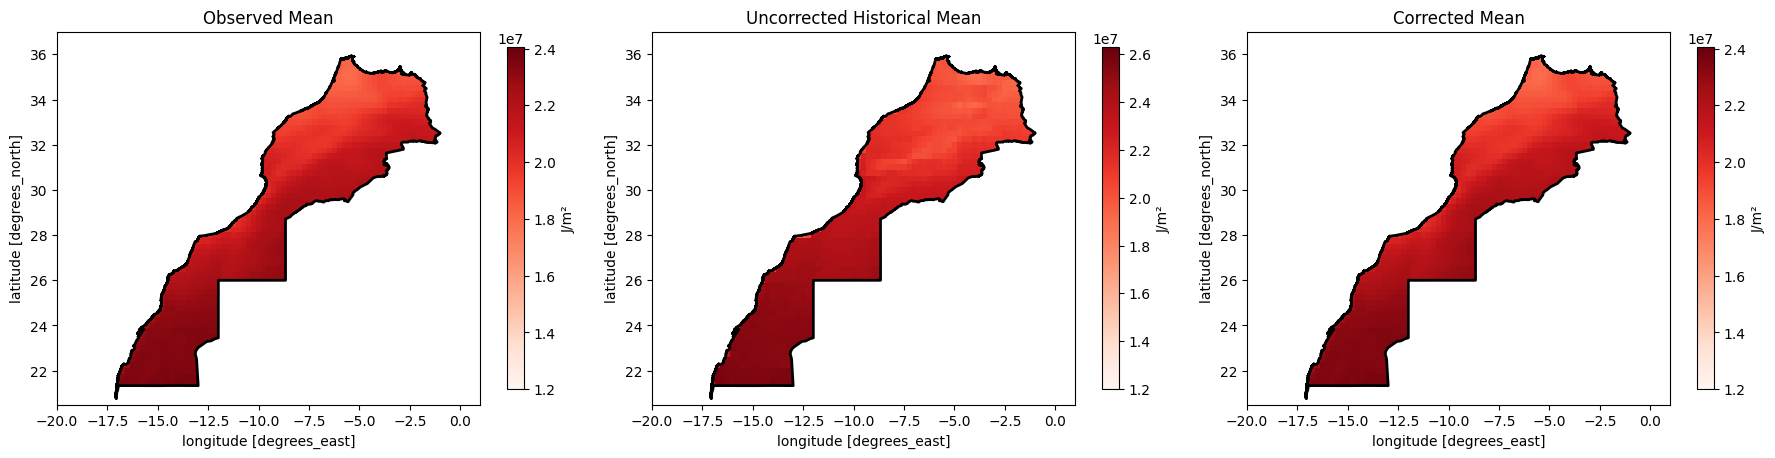

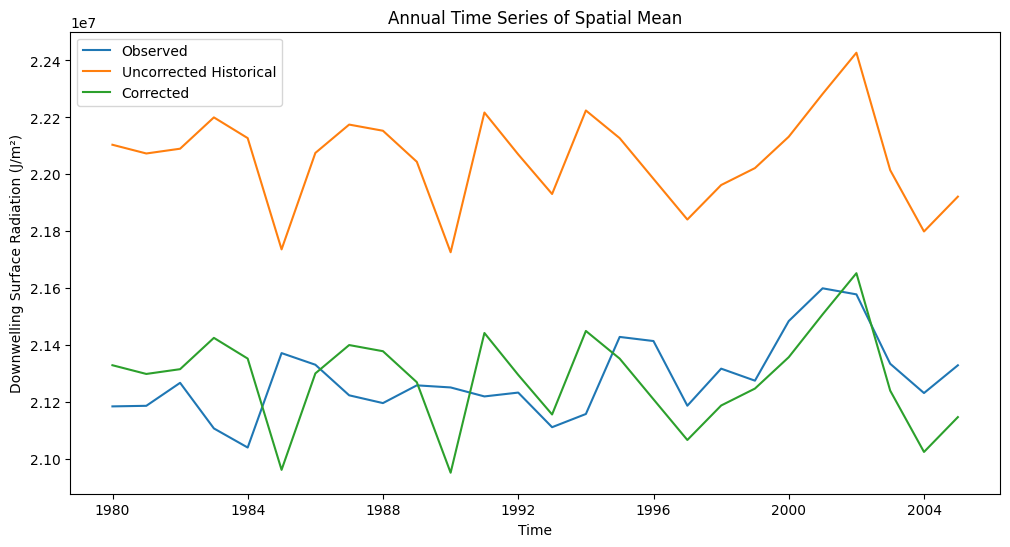

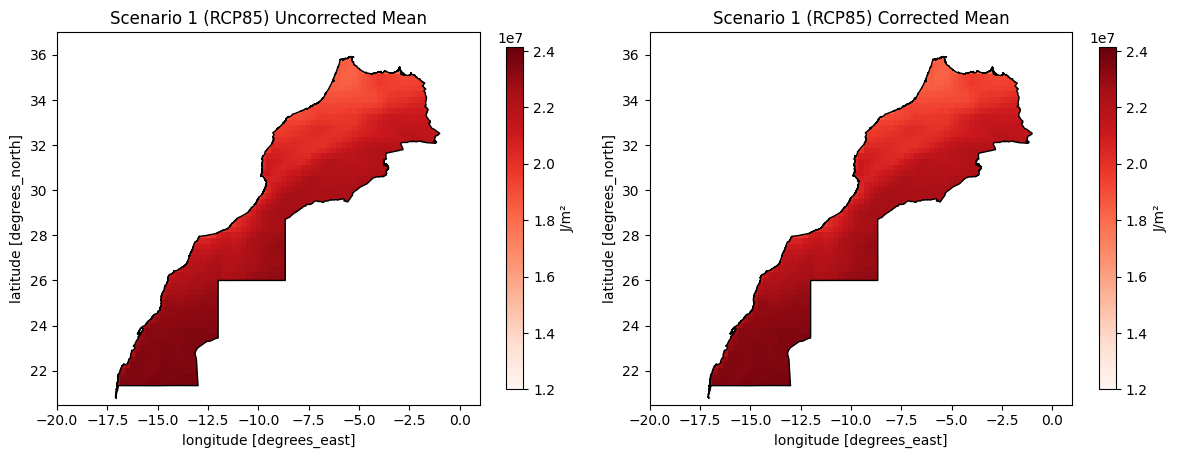

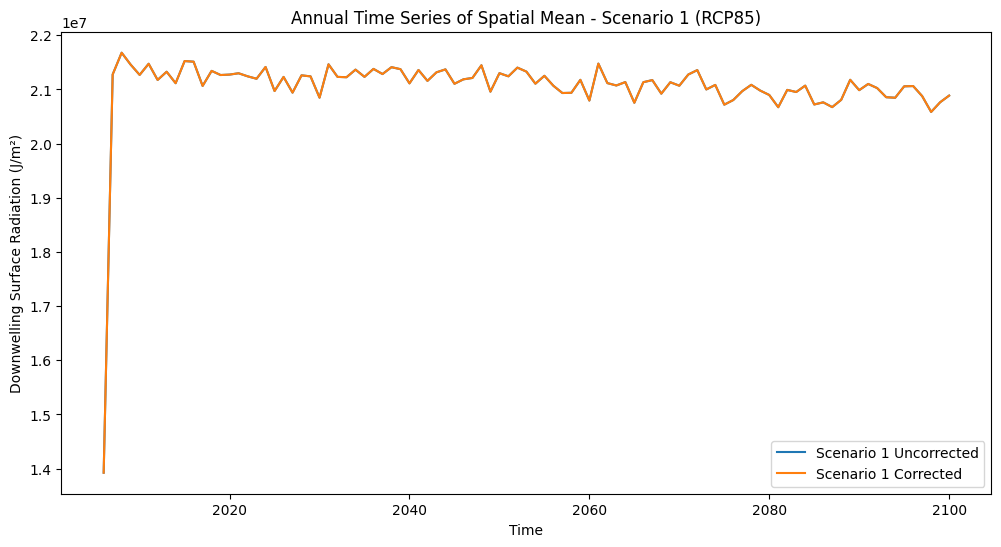

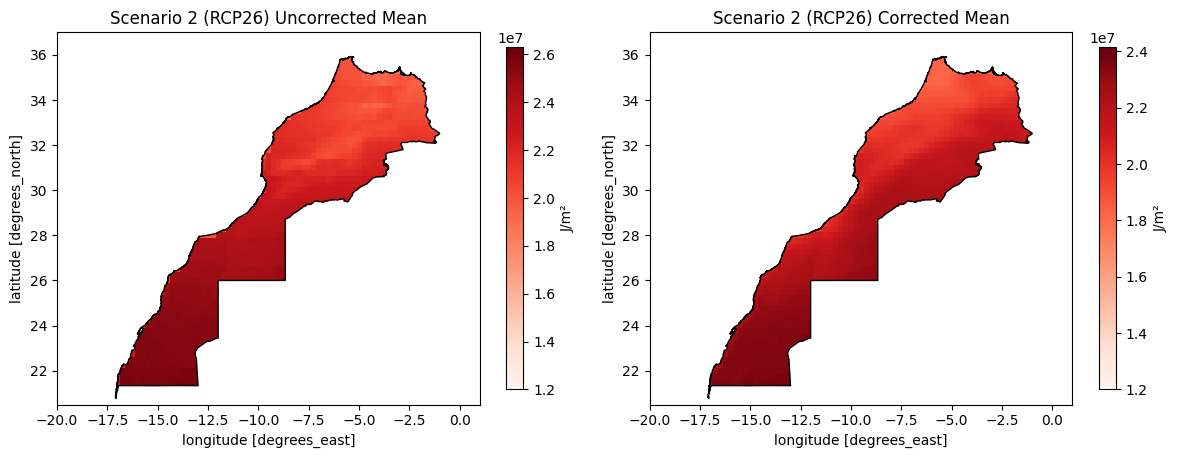

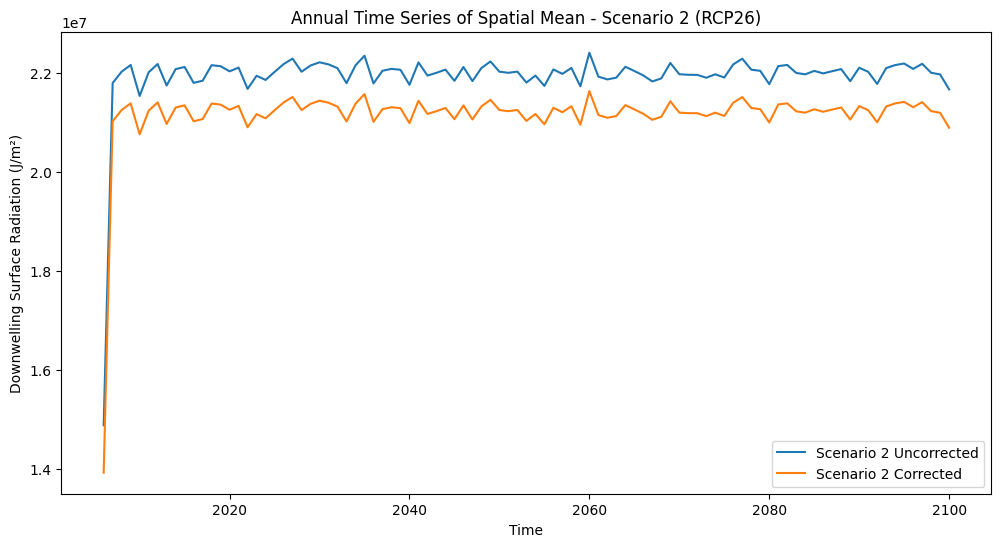

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


shapefile_path = "drive/MyDrive/data/maroc/"
morocco = gpd.read_file(shapefile_path, crs='EPSG:4326')

# File paths for data
historical_file_rad = '/content/drive/MyDrive/data/BC_data/control/Rad_control.nc'
corrected_file_rad = '/content/drive/MyDrive/data/BC_data/BC_control/BC_Rad_control_.nc'
observed_file_rad = '/content/drive/MyDrive/data/BC_data/ERA5/Rad_ERA5.nc'
scenario1_file_rad = '/content/drive/MyDrive/data/BC_data/RCP85/Rad_RCP85.nc'
scenario1_corrected_file_rad = '/content/drive/MyDrive/data/BC_data/BC_RCP85/BC_Rad_RCP85_.nc'
scenario2_file_rad = '/content/drive/MyDrive/data/BC_data/RCP26/Rad_RCP26.nc'
scenario2_corrected_file_rad = '/content/drive/MyDrive/data/BC_data/BC_RCP26/BC_Rad_RCP26_.nc'

# Load datasets
historical_data_rad = xr.open_dataset(historical_file_rad)
corrected_data_rad = xr.open_dataset(corrected_file_rad)
observed_data_rad = xr.open_dataset(observed_file_rad)
scenario1_data_rad = xr.open_dataset(scenario1_file_rad)
scenario1_corrected_data_rad = xr.open_dataset(scenario1_corrected_file_rad)
scenario2_data_rad = xr.open_dataset(scenario2_file_rad)
scenario2_corrected_data_rad = xr.open_dataset(scenario2_corrected_file_rad)

# time slicing
time_slice = slice('1979-01-01', '2005-11-30')

historical_data_rad = historical_data_rad.sel(time=time_slice)
corrected_data_rad = corrected_data_rad.sel(time=time_slice)
observed_data_rad = observed_data_rad.sel(time=time_slice)

# Remove duplicate time entries
historical_data_rad = historical_data_rad.sel(time=~historical_data_rad.get_index("time").duplicated())
corrected_data_rad = corrected_data_rad.sel(time=~corrected_data_rad.get_index("time").duplicated())
observed_data_rad = observed_data_rad.sel(time=~observed_data_rad.get_index("time").duplicated())
scenario1_data_rad = scenario1_data_rad.sel(time=~scenario1_data_rad.get_index("time").duplicated())
scenario1_corrected_data_rad = scenario1_corrected_data_rad.sel(time=~scenario1_corrected_data_rad.get_index("time").duplicated())
scenario2_data_rad = scenario2_data_rad.sel(time=~scenario2_data_rad.get_index("time").duplicated())
scenario2_corrected_data_rad = scenario2_corrected_data_rad.sel(time=~scenario2_corrected_data_rad.get_index("time").duplicated())

# Temporal mean
historical_mean_rad = historical_data_rad['rsds'].mean(dim='time')   # Convert J/m² to kW/m²
corrected_mean_rad = corrected_data_rad['rsds'].mean(dim='time')   # Convert W/m² to kW/m²
observed_mean_rad = observed_data_rad['ssrd'].mean(dim='time')   # Convert W/m² to kW/m²

# Plot temporal means for historical data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
observed_mean_rad.plot(ax=axes[0], cmap='Reds',  vmin=1.2*(10**7), cbar_kwargs={'shrink': 0.6, 'label': 'J/m²'})
axes[0].set_title('Observed Mean')
historical_mean_rad.plot(ax=axes[1], cmap='Reds', vmin=1.2*(10**7), cbar_kwargs={'shrink': 0.6, 'label': 'J/m²'})
axes[1].set_title('Uncorrected Historical Mean')
corrected_mean_rad.plot(ax=axes[2], cmap='Reds', vmin=1.2*(10**7), cbar_kwargs={'shrink': 0.6, 'label': 'J/m²'})
axes[2].set_title('Corrected Mean')

# Add Morocco boundaries
for i, ax in enumerate(axes):
    morocco.plot(ax=ax, color="white", edgecolor='black', linewidth=2)
    ax.set_xlim(-20, 1)
    ax.set_ylim(20.5, 37)

plt.tight_layout()
plt.show()

# Monthly mean, then annual mean
historical_monthly_mean_rad = historical_data_rad['rsds'].resample(time='1M').mean()
historical_annual_mean_rad = historical_monthly_mean_rad.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])   # Convert J/m² to kW/m²

corrected_monthly_mean_rad = corrected_data_rad['rsds'].resample(time='1M').mean()
corrected_annual_mean_rad = corrected_monthly_mean_rad.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])  # Convert W/m² to kW/m²

observed_monthly_mean_rad = observed_data_rad['ssrd'].resample(time='1M').mean()
observed_annual_mean_rad = observed_monthly_mean_rad.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])  # Convert W/m² to kW/m²

# Plot annual time series for historical data
plt.figure(figsize=(12, 6))
plt.plot(observed_annual_mean_rad['time'], observed_annual_mean_rad, label='Observed')
plt.plot(historical_annual_mean_rad['time'], historical_annual_mean_rad, label='Uncorrected Historical')
plt.plot(corrected_annual_mean_rad['time'], corrected_annual_mean_rad, label='Corrected')
plt.xlabel('Time')
plt.ylabel('Downwelling Surface Radiation (J/m²)')
plt.title('Annual Time Series of Spatial Mean')
plt.legend()
plt.show()

# Temporal mean for scenarios
scenario1_monthly_mean_rad = scenario1_data_rad['rsds'].resample(time='1M').mean()
scenario1_annual_mean_rad = scenario1_monthly_mean_rad.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])   # Convert J/m² to kW/m²

scenario1_corrected_monthly_mean_rad = scenario1_corrected_data_rad['rsds'].resample(time='1M').mean()
scenario1_corrected_annual_mean_rad = scenario1_corrected_monthly_mean_rad.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])   # Convert W/m² to kW/m²

scenario2_monthly_mean_rad = scenario2_data_rad['rsds'].resample(time='1M').mean()
scenario2_annual_mean_rad = scenario2_monthly_mean_rad.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])   # Convert J/m² to kW/m²

scenario2_corrected_monthly_mean_rad = scenario2_corrected_data_rad['rsds'].resample(time='1M').mean()
scenario2_corrected_annual_mean_rad = scenario2_corrected_monthly_mean_rad.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])  # Convert W/m² to kW/m²

# Plot temporal means for Scenario 1 (RCP85)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
scenario1_monthly_mean_rad.mean(dim='time').plot(ax=axes[0], cmap='Reds', vmin=1.2*(10**7), cbar_kwargs={'shrink': 0.6, 'label': 'J/m²'})
axes[0].set_title('Scenario 1 (RCP85) Uncorrected Mean')
scenario1_corrected_monthly_mean_rad.mean(dim='time').plot(ax=axes[1], cmap='Reds', vmin=1.2*(10**7), cbar_kwargs={'shrink': 0.6, 'label': 'J/m²'})
axes[1].set_title('Scenario 1 (RCP85) Corrected Mean')

# Add Morocco boundaries
for i, ax in enumerate(axes):
    morocco.plot(ax=ax, color="white", edgecolor='black', linewidth=1)
    ax.set_xlim(-20, 1)
    ax.set_ylim(20.5, 37)

plt.tight_layout()
plt.show()

# Plot annual time series for Scenario 1 (RCP85)
plt.figure(figsize=(12, 6))
plt.plot(scenario1_annual_mean_rad['time'], scenario1_annual_mean_rad, label='Scenario 1 Uncorrected')
plt.plot(scenario1_corrected_annual_mean_rad['time'], scenario1_corrected_annual_mean_rad, label='Scenario 1 Corrected')
plt.xlabel('Time')
plt.ylabel('Downwelling Surface Radiation (J/m²)')
plt.title('Annual Time Series of Spatial Mean - Scenario 1 (RCP85)')
plt.legend()
plt.show()

# Plot temporal means for Scenario 2 (RCP26)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
scenario2_monthly_mean_rad.mean(dim='time').plot(ax=axes[0], cmap='Reds', vmin=1.2*(10**7), cbar_kwargs={'shrink': 0.6, 'label': 'J/m²'})
axes[0].set_title('Scenario 2 (RCP26) Uncorrected Mean')
scenario2_corrected_monthly_mean_rad.mean(dim='time').plot(ax=axes[1], cmap='Reds' , vmin=1.2*(10**7), cbar_kwargs={'shrink': 0.6, 'label': 'J/m²'})
axes[1].set_title('Scenario 2 (RCP26) Corrected Mean')

# Add Morocco boundaries
for i, ax in enumerate(axes):
    morocco.plot(ax=ax, color="white", edgecolor='black', linewidth=1)
    ax.set_xlim(-20, 1)
    ax.set_ylim(20.5, 37)

plt.tight_layout()
plt.show()

# Plot annual time series for Scenario 2 (RCP26)
plt.figure(figsize=(12, 6))
plt.plot(scenario2_annual_mean_rad['time'], scenario2_annual_mean_rad, label='Scenario 2 Uncorrected')
plt.plot(scenario2_corrected_annual_mean_rad['time'], scenario2_corrected_annual_mean_rad, label='Scenario 2 Corrected')
plt.xlabel('Time')
plt.ylabel('Downwelling Surface Radiation (J/m²)')
plt.title('Annual Time Series of Spatial Mean - Scenario 2 (RCP26)')
plt.legend()
plt.show()

Mounted at /content/drive


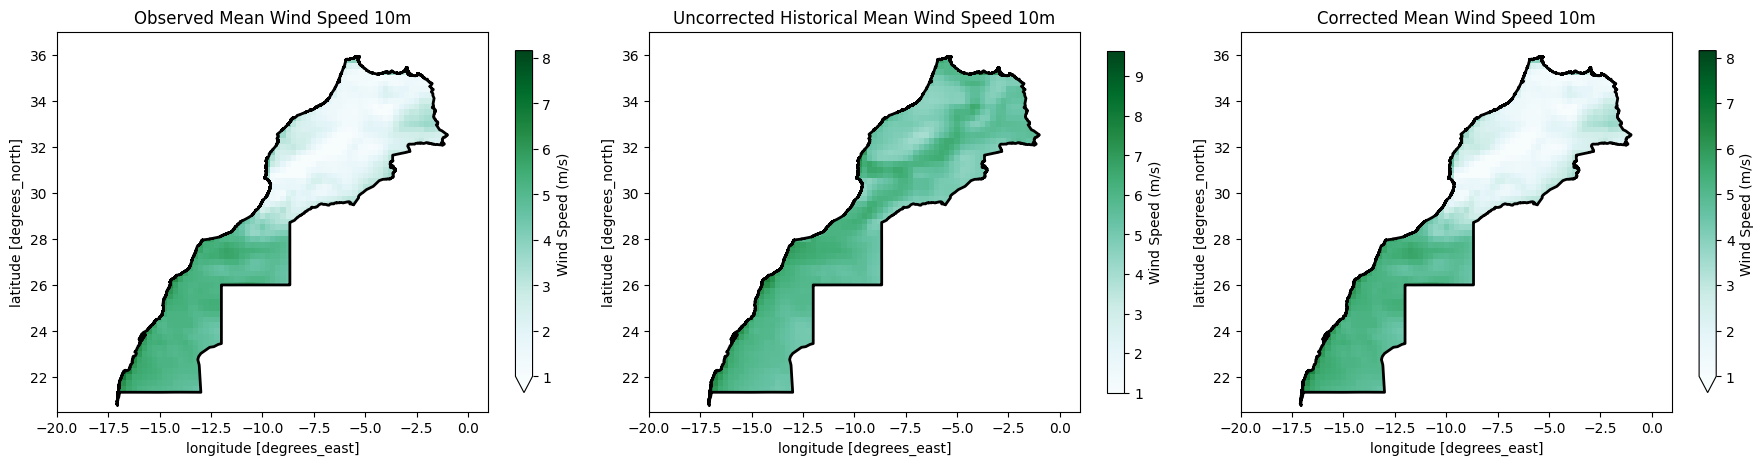

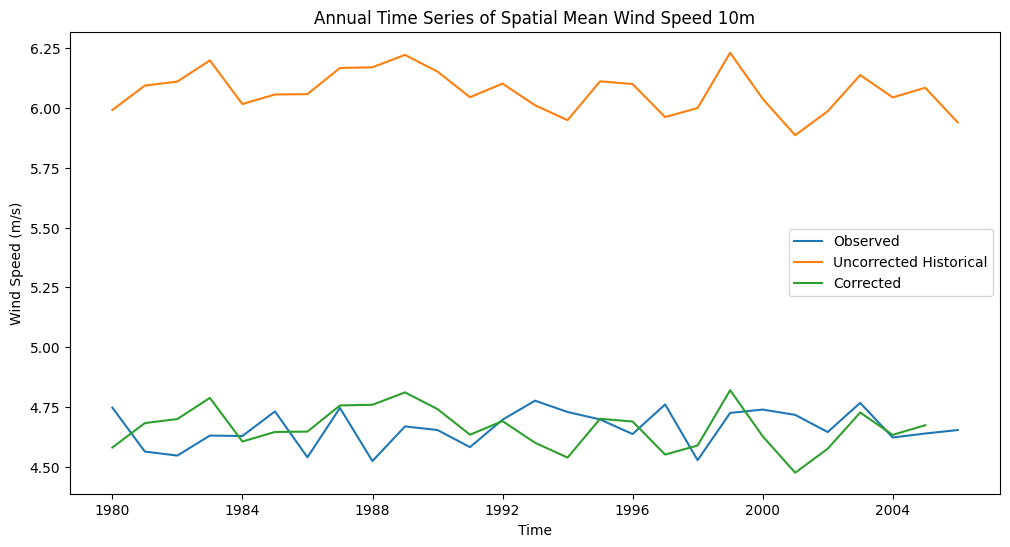

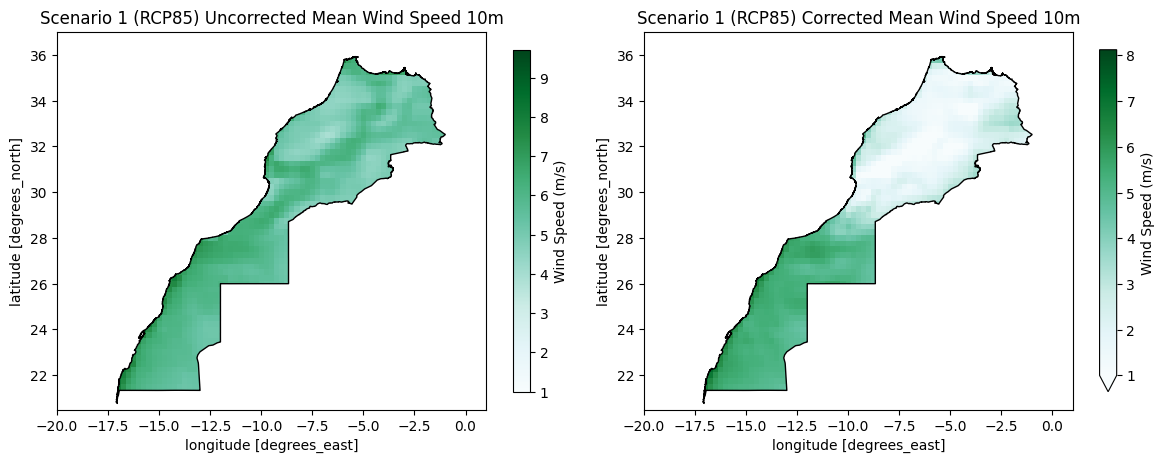

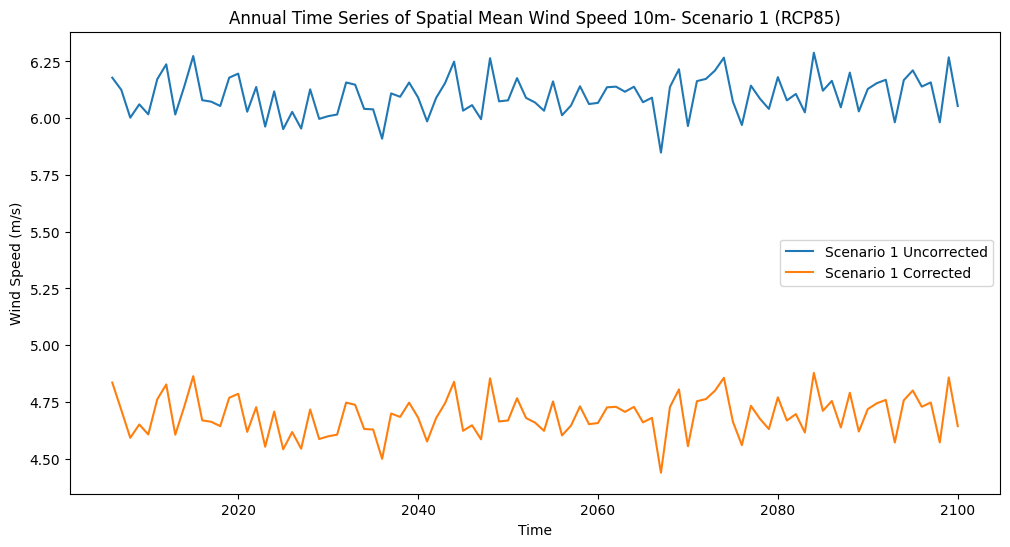

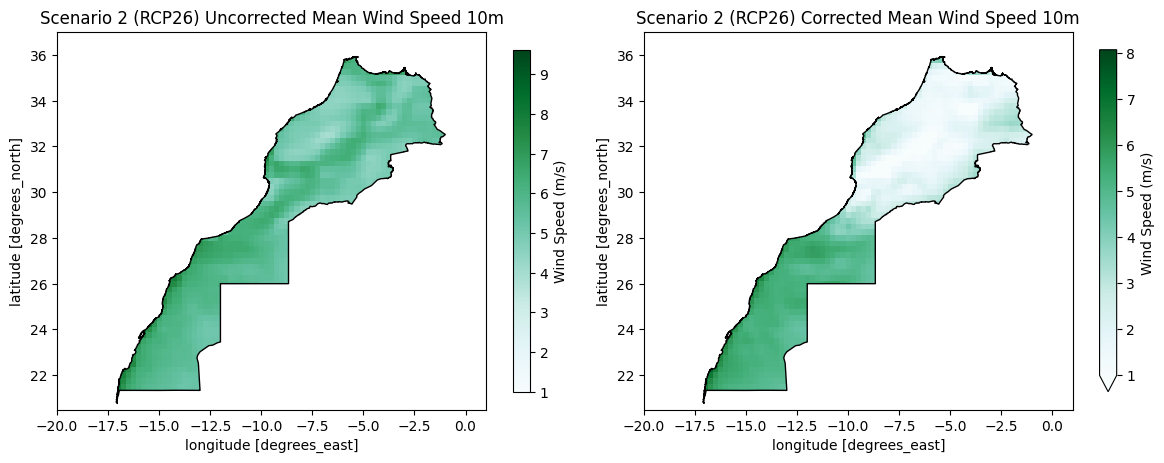

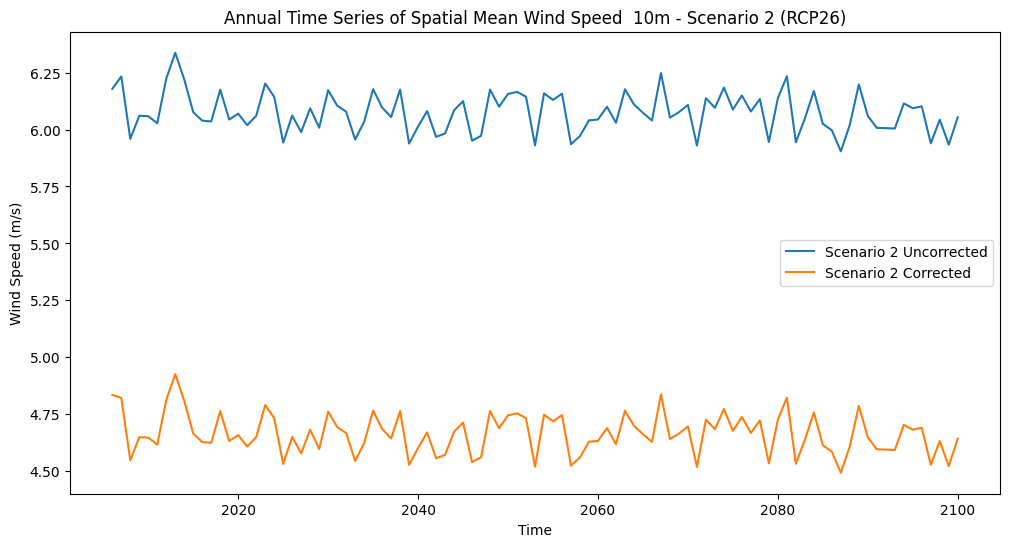

In [ ]:


import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

shapefile_path = "drive/MyDrive/data/maroc/"
morocco = gpd.read_file(shapefile_path, crs='EPSG:4326')

# File paths for data
historical_file_wind10 = '/content/drive/MyDrive/data/MPI/Wind_Near_surface/RF/sfcWind_Morocco-22_MPI-M-MPI-ESM-MR_historical_r1i1p1_ICTP-RegCM4-7_v0_day_1970-2005.nc'
corrected_file_wind10 = '/content/drive/MyDrive/data/new/BC_control/BC_wspd10m_control_.nc'
observed_file_u_wind10 = '/content/drive/MyDrive/data/era5/era5_daily_10m_u_component_of_wind_data_1979-2023.nc'
observed_file_v_wind10 = '/content/drive/MyDrive/data/era5/era5_daily_10m_v_component_of_wind_data_1979-2023.nc'
scenario1_file_wind10 = '/content/drive/MyDrive/data/MPI/Wind_Near_surface/RCP85/sfcWind_Morocco-22_MPI-M-MPI-ESM-MR_rcp85_r1i1p1_ICTP-RegCM4-7_v0_day_2005-2100.nc'
scenario1_corrected_file_wind10 = '/content/drive/MyDrive/data/new/BC_RCP85/BC_wspd10m_RCP85_.nc'
scenario2_file_wind10 = '/content/drive/MyDrive/data/MPI/Wind_Near_surface/RCP26/sfcWind_Morocco-22_MPI-M-MPI-ESM-MR_rcp26_r1i1p1_ICTP-RegCM4-7_v0_day_2005-2100.nc'
scenario2_corrected_file_wind10 = '/content/drive/MyDrive/data/new/BC_RCP26/BC_wspd10m_RCP26_.nc'

# Load datasets
historical_data_wind10 = xr.open_dataset(historical_file_wind10)
corrected_data_wind10 = xr.open_dataset(corrected_file_wind10)
observed_data_u_wind10 = xr.open_dataset(observed_file_u_wind10)
observed_data_v_wind10 = xr.open_dataset(observed_file_v_wind10)
scenario1_data_wind10 = xr.open_dataset(scenario1_file_wind10)
scenario1_corrected_data_wind10 = xr.open_dataset(scenario1_corrected_file_wind10)
scenario2_data_wind10 = xr.open_dataset(scenario2_file_wind10)
scenario2_corrected_data_wind10 = xr.open_dataset(scenario2_corrected_file_wind10)

# Define the time slice
time_slice = slice('1979-01-01', '2005-11-30')

# Apply the time slice
historical_data_wind10 = historical_data_wind10.sel(time=time_slice)
corrected_data_wind10 = corrected_data_wind10.sel(time=time_slice)
observed_data_u_wind10 = observed_data_u_wind10.sel(time=time_slice)
observed_data_v_wind10 = observed_data_v_wind10.sel(time=time_slice)

# Remove duplicate time entries
historical_data_wind10 = historical_data_wind10.sel(time=~historical_data_wind10.get_index("time").duplicated())
corrected_data_wind10 = corrected_data_wind10.sel(time=~corrected_data_wind10.get_index("time").duplicated())
observed_data_u_wind10 = observed_data_u_wind10.sel(time=~observed_data_u_wind10.get_index("time").duplicated())
observed_data_v_wind10 = observed_data_v_wind10.sel(time=~observed_data_v_wind10.get_index("time").duplicated())
scenario1_data_wind10 = scenario1_data_wind10.sel(time=~scenario1_data_wind10.get_index("time").duplicated())
scenario1_corrected_data_wind10 = scenario1_corrected_data_wind10.sel(time=~scenario1_corrected_data_wind10.get_index("time").duplicated())
scenario2_data_wind10 = scenario2_data_wind10.sel(time=~scenario2_data_wind10.get_index("time").duplicated())
scenario2_corrected_data_wind10 = scenario2_corrected_data_wind10.sel(time=~scenario2_corrected_data_wind10.get_index("time").duplicated())

# Ensure latitude and longitude ranges match
lat_range = slice(np.array(historical_data_wind10["latitude"]).max(),
                  np.array(historical_data_wind10["latitude"]).min())
lon_range = slice(np.array(historical_data_wind10["longitude"]).min(),
                  np.array(historical_data_wind10["longitude"]).max())

observed_data_u_wind10 = observed_data_u_wind10.sel(latitude=lat_range, longitude=lon_range)
observed_data_v_wind10 = observed_data_v_wind10.sel(latitude=lat_range, longitude=lon_range)

# Compute wind speed from u and v components
observed_data_wind10 = np.sqrt(observed_data_u_wind10['u10']**2 + observed_data_v_wind10['v10']**2)
observed_data_wind10 = xr.DataArray(observed_data_wind10,
                                    coords={'time': observed_data_u_wind10['time'],
                                            'latitude': observed_data_u_wind10['latitude'],
                                            'longitude': observed_data_u_wind10['longitude']},
                                    dims=['time', 'latitude', 'longitude'],
                                    name='sfcWind')

# Temporal mean
historical_mean_wind10 = historical_data_wind10['sfcWind'].mean(dim='time')
corrected_mean_wind10 = corrected_data_wind10['sfcWind'].mean(dim='time')
observed_mean_wind10 = observed_data_wind10.mean(dim='time')

# Plot temporal means for historical data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
observed_mean_wind10.plot(ax=axes[0], cmap='BuGn', vmin=1, cbar_kwargs={'shrink': 0.6, 'label': 'Wind Speed (m/s)'})
axes[0].set_title('Observed Mean Wind Speed 10m')
historical_mean_wind10.plot(ax=axes[1], cmap='BuGn', vmin=1, cbar_kwargs={'shrink': 0.6, 'label': 'Wind Speed (m/s)'})
axes[1].set_title('Uncorrected Historical Mean Wind Speed 10m')
corrected_mean_wind10.plot(ax=axes[2], cmap='BuGn', vmin=1, cbar_kwargs={'shrink': 0.6, 'label': 'Wind Speed (m/s)'})
axes[2].set_title('Corrected Mean Wind Speed 10m')

# Add Morocco boundaries
for i, ax in enumerate(axes):
    morocco.plot(ax=ax, color="white", edgecolor='black', linewidth=2)
    ax.set_xlim(-20, 1)
    ax.set_ylim(20.5, 37)

plt.tight_layout()
plt.show()

# Monthly mean, then annual mean
historical_monthly_mean_wind10 = historical_data_wind10['sfcWind'].resample(time='1M').mean()
historical_annual_mean_wind10 = historical_monthly_mean_wind10.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])

corrected_monthly_mean_wind10 = corrected_data_wind10['sfcWind'].resample(time='1M').mean()
corrected_annual_mean_wind10 = corrected_monthly_mean_wind10.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])

observed_monthly_mean_wind10 = observed_data_wind10.resample(time='1M').mean()
observed_annual_mean_wind10 = observed_monthly_mean_wind10.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])

# Plot annual time series for historical data
plt.figure(figsize=(12, 6))
plt.plot(observed_annual_mean_wind10['time'], observed_annual_mean_wind10, label='Observed')
plt.plot(historical_annual_mean_wind10['time'], historical_annual_mean_wind10, label='Uncorrected Historical')
plt.plot(corrected_annual_mean_wind10['time'], corrected_annual_mean_wind10, label='Corrected')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.title('Annual Time Series of Spatial Mean Wind Speed 10m')
plt.legend()
plt.show()

# Temporal mean for scenarios
scenario1_monthly_mean_wind10 = scenario1_data_wind10['sfcWind'].resample(time='1M').mean()
scenario1_annual_mean_wind10 = scenario1_monthly_mean_wind10.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])

scenario1_corrected_monthly_mean_wind10 = scenario1_corrected_data_wind10['sfcWind'].resample(time='1M').mean()
scenario1_corrected_annual_mean_wind10 = scenario1_corrected_monthly_mean_wind10.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])

scenario2_monthly_mean_wind10 = scenario2_data_wind10['sfcWind'].resample(time='1M').mean()
scenario2_annual_mean_wind10 = scenario2_monthly_mean_wind10.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])

scenario2_corrected_monthly_mean_wind10 = scenario2_corrected_data_wind10['sfcWind'].resample(time='1M').mean()
scenario2_corrected_annual_mean_wind10 = scenario2_corrected_monthly_mean_wind10.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])

# Plot temporal means for Scenario 1 (RCP85)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
scenario1_monthly_mean_wind10.mean(dim='time').plot(ax=axes[0], cmap='BuGn', vmin=1, cbar_kwargs={'shrink': 0.6, 'label': 'Wind Speed (m/s)'})
axes[0].set_title('Scenario 1 (RCP85) Uncorrected Mean Wind Speed 10m')
scenario1_corrected_monthly_mean_wind10.mean(dim='time').plot(ax=axes[1], cmap='BuGn', vmin=1, cbar_kwargs={'shrink': 0.6, 'label': 'Wind Speed (m/s)'})
axes[1].set_title('Scenario 1 (RCP85) Corrected Mean Wind Speed 10m')

# Add Morocco boundaries
for i, ax in enumerate(axes):
    morocco.plot(ax=ax, color="white", edgecolor='black', linewidth=1)
    ax.set_xlim(-20, 1)
    ax.set_ylim(20.5, 37)

plt.tight_layout()
plt.show()

# Plot annual time series for Scenario 1 (RCP85)
plt.figure(figsize=(12, 6))
plt.plot(scenario1_annual_mean_wind10['time'], scenario1_annual_mean_wind10, label='Scenario 1 Uncorrected')
plt.plot(scenario1_corrected_annual_mean_wind10['time'], scenario1_corrected_annual_mean_wind10, label='Scenario 1 Corrected')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.title('Annual Time Series of Spatial Mean Wind Speed 10m- Scenario 1 (RCP85)')
plt.legend()
plt.show()

# Plot temporal means for Scenario 2 (RCP26)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
scenario2_monthly_mean_wind10.mean(dim='time').plot(ax=axes[0], cmap='BuGn', vmin=1, cbar_kwargs={'shrink': 0.6, 'label': 'Wind Speed (m/s)'})
axes[0].set_title('Scenario 2 (RCP26) Uncorrected Mean Wind Speed 10m')
scenario2_corrected_monthly_mean_wind10.mean(dim='time').plot(ax=axes[1], cmap='BuGn', vmin=1, cbar_kwargs={'shrink': 0.6, 'label': 'Wind Speed (m/s)'})
axes[1].set_title('Scenario 2 (RCP26) Corrected Mean Wind Speed 10m')

# Add Morocco boundaries
for i, ax in enumerate(axes):
    morocco.plot(ax=ax, color="white", edgecolor='black', linewidth=1)
    ax.set_xlim(-20, 1)
    ax.set_ylim(20.5, 37)

plt.tight_layout()
plt.show()

# Plot annual time series for Scenario 2 (RCP26)
plt.figure(figsize=(12, 6))
plt.plot(scenario2_annual_mean_wind10['time'], scenario2_annual_mean_wind10, label='Scenario 2 Uncorrected')
plt.plot(scenario2_corrected_annual_mean_wind10['time'], scenario2_corrected_annual_mean_wind10, label='Scenario 2 Corrected')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.title('Annual Time Series of Spatial Mean Wind Speed  10m - Scenario 2 (RCP26)')
plt.legend()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


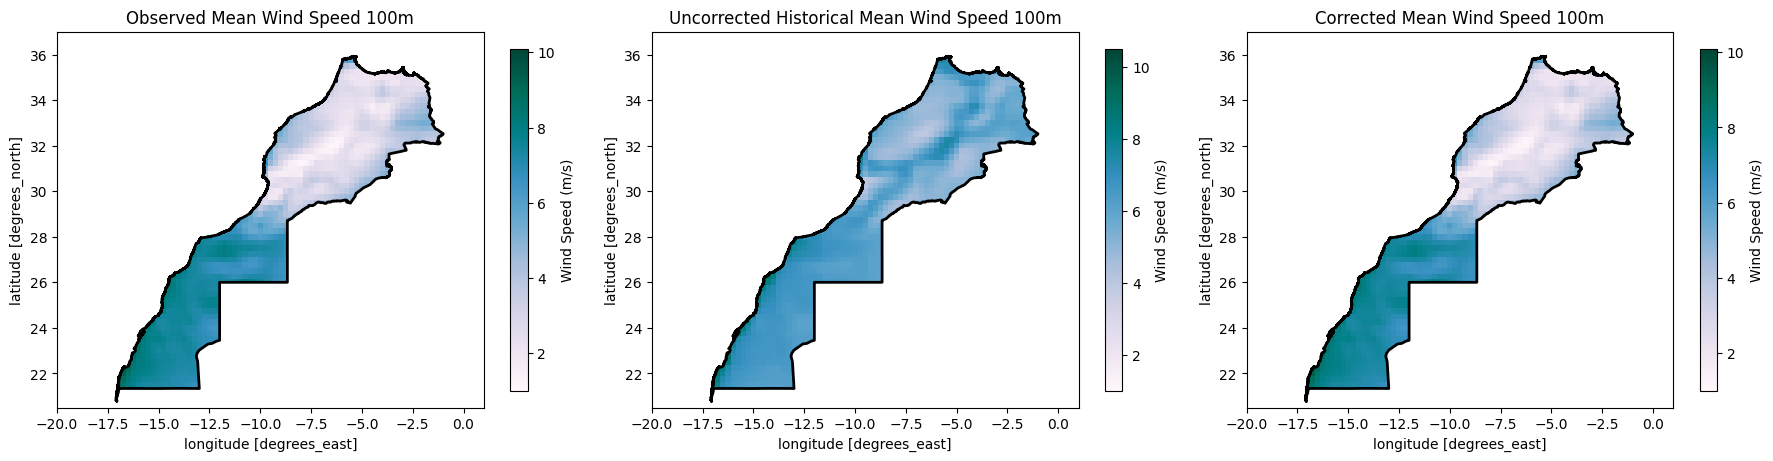

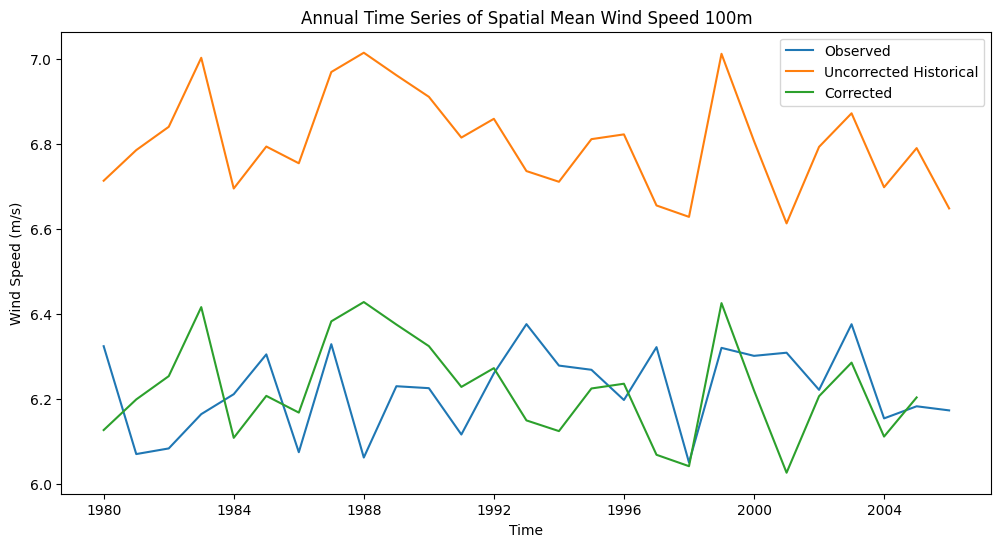

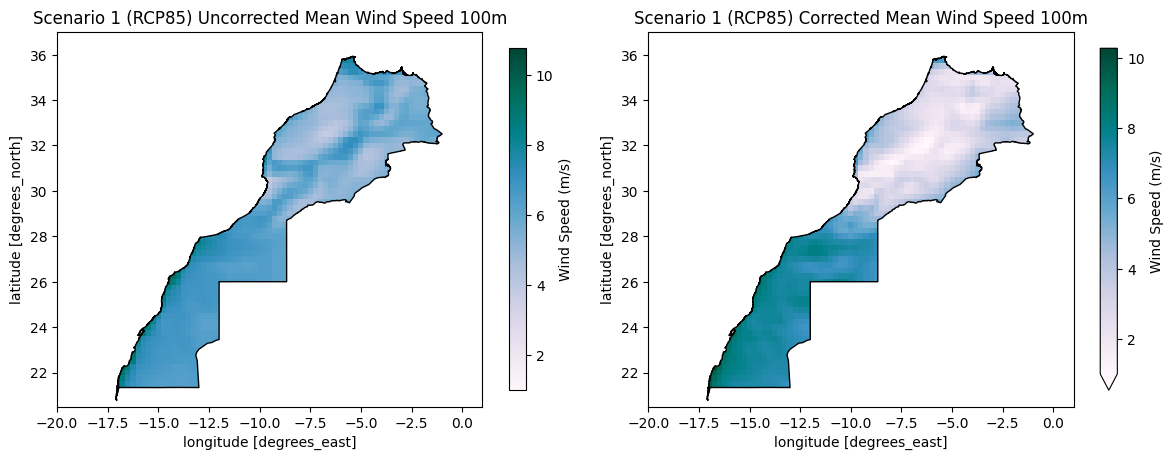

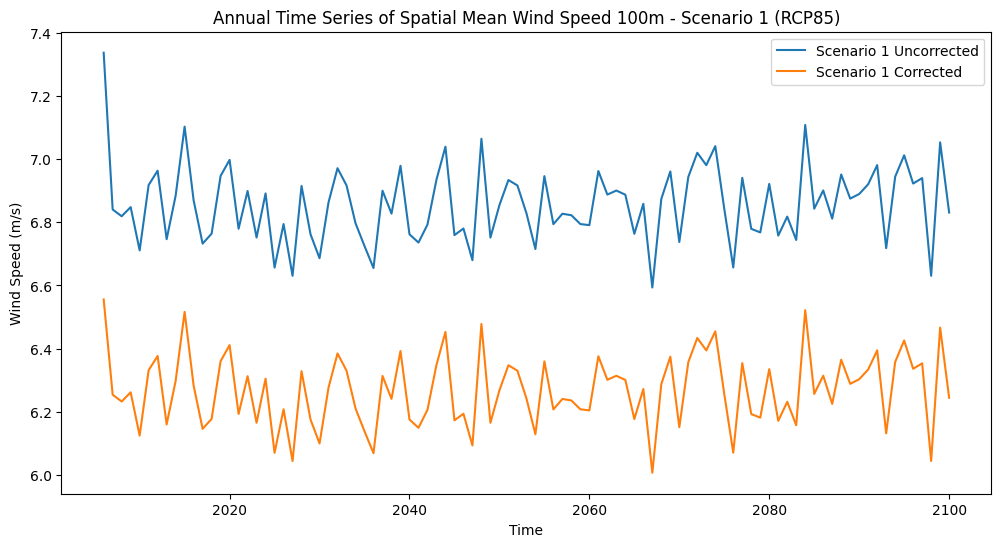

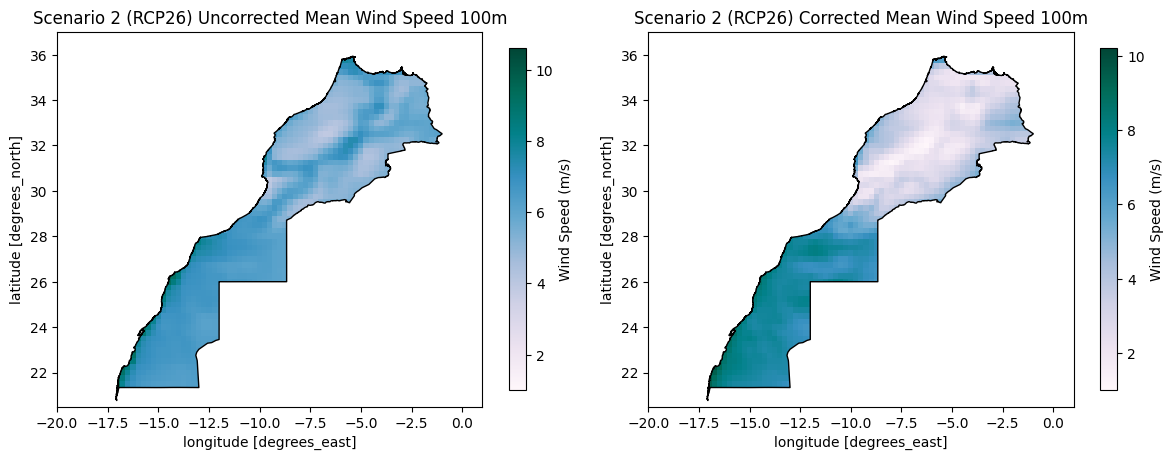

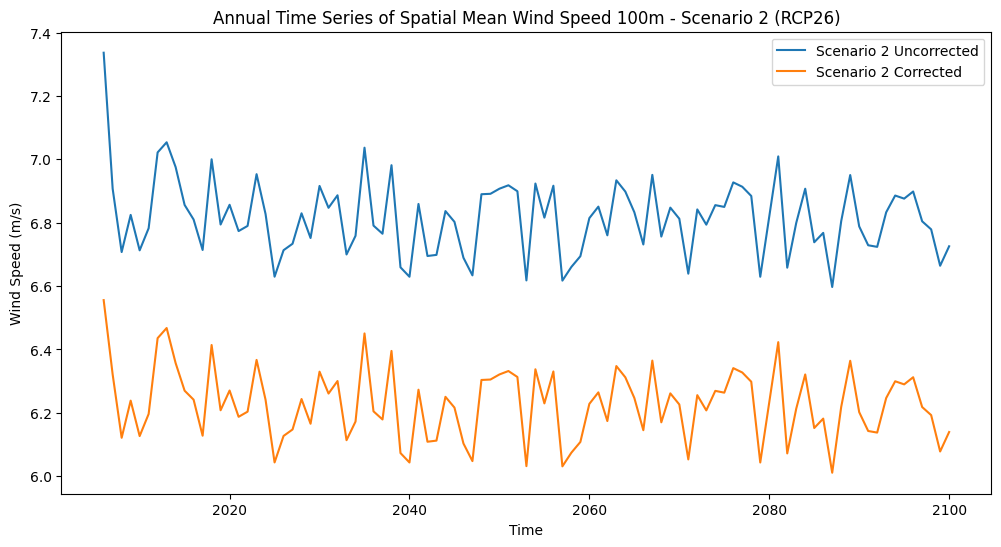

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load shapefiles for Morocco
shapefile_path = "drive/MyDrive/data/maroc/"
morocco = gpd.read_file(shapefile_path, crs='EPSG:4326')

# File paths for data
historical_file_wind100 = '/content/drive/MyDrive/data/MPI/wind_10m/RF/wspd100m_Morocco-22_MPI-M-MPI-ESM-MR_historical_r1i1p1_ICTP-RegCM4-7_v0_day_1970-2005.nc'
corrected_file_wind100 = '/content/drive/MyDrive/data/new/BC_control/BC_wspd100m_control_.nc'
observed_file_u_wind100 = '/content/drive/MyDrive/data/era5/era5_daily_100m_u_component_of_wind_data_1979-2023.nc'
observed_file_v_wind100 = '/content/drive/MyDrive/data/era5/era5_daily_100m_v_component_of_wind_data_1979-2023.nc'
scenario1_file_wind100 = '/content/drive/MyDrive/data/MPI/wind_10m/RCP85/wspd100m_Morocco-22_MPI-M-MPI-ESM-MR_rcp85_r1i1p1_ICTP-RegCM4-7_v0_day_2005-2100.nc'
scenario1_corrected_file_wind100 = '/content/drive/MyDrive/data/new/BC_RCP85/BC_wspd100m_RCP85_.nc'
scenario2_file_wind100 = '/content/drive/MyDrive/data/MPI/wind_10m/RCP26/wspd100m_Morocco-22_MPI-M-MPI-ESM-MR_rcp26_r1i1p1_ICTP-RegCM4-7_v0_day_2005-2100.nc'
scenario2_corrected_file_wind100 = '/content/drive/MyDrive/data/new/BC_RCP26/BC_wspd100m_RCP26_.nc'

# Load datasets
historical_data_wind100 = xr.open_dataset(historical_file_wind100)
corrected_data_wind100 = xr.open_dataset(corrected_file_wind100)
observed_data_u_wind100 = xr.open_dataset(observed_file_u_wind100)
observed_data_v_wind100 = xr.open_dataset(observed_file_v_wind100)
scenario1_data_wind100 = xr.open_dataset(scenario1_file_wind100)
scenario1_corrected_data_wind100 = xr.open_dataset(scenario1_corrected_file_wind100)
scenario2_data_wind100 = xr.open_dataset(scenario2_file_wind100)
scenario2_corrected_data_wind100 = xr.open_dataset(scenario2_corrected_file_wind100)


# Define the time slice
time_slice = slice('1979-01-01', '2005-11-30')

# Apply the time slice
historical_data_wind100 = historical_data_wind100.sel(time=time_slice)
corrected_data_wind100 = corrected_data_wind100.sel(time=time_slice)
observed_data_u_wind100 = observed_data_u_wind100.sel(time=time_slice)
observed_data_v_wind100 = observed_data_v_wind100.sel(time=time_slice)

# Remove duplicate time entries
historical_data_wind100 = historical_data_wind100.sel(time=~historical_data_wind100.get_index("time").duplicated())
corrected_data_wind100 = corrected_data_wind100.sel(time=~corrected_data_wind100.get_index("time").duplicated())
observed_data_u_wind100 = observed_data_u_wind100.sel(time=~observed_data_u_wind100.get_index("time").duplicated())
observed_data_v_wind100 = observed_data_v_wind100.sel(time=~observed_data_v_wind100.get_index("time").duplicated())
scenario1_data_wind100 = scenario1_data_wind100.sel(time=~scenario1_data_wind100.get_index("time").duplicated())
scenario1_corrected_data_wind100 = scenario1_corrected_data_wind100.sel(time=~scenario1_corrected_data_wind100.get_index("time").duplicated())
scenario2_data_wind100 = scenario2_data_wind100.sel(time=~scenario2_data_wind100.get_index("time").duplicated())
scenario2_corrected_data_wind100 = scenario2_corrected_data_wind100.sel(time=~scenario2_corrected_data_wind100.get_index("time").duplicated())

# Ensure latitude and longitude ranges match
lat_range = slice(np.array(historical_data_wind100["latitude"]).max(),
                  np.array(historical_data_wind100["latitude"]).min())
lon_range = slice(np.array(historical_data_wind100["longitude"]).min(),
                  np.array(historical_data_wind100["longitude"]).max())

observed_data_u_wind100 = observed_data_u_wind100.sel(latitude=lat_range, longitude=lon_range)
observed_data_v_wind100 = observed_data_v_wind100.sel(latitude=lat_range, longitude=lon_range)

# Compute wind speed from u and v components
observed_data_wind100 = np.sqrt(observed_data_u_wind100['u100']**2 + observed_data_v_wind100['v100']**2)
observed_data_wind100 = xr.DataArray(observed_data_wind100,
                                    coords={'time': observed_data_u_wind100['time'],
                                            'latitude': observed_data_u_wind100['latitude'],
                                            'longitude': observed_data_u_wind100['longitude']},
                                    dims=['time', 'latitude', 'longitude'],
                                    name='sfcWind')

# Temporal mean
historical_mean_wind100 = historical_data_wind100['ua100m'].mean(dim='time')
corrected_mean_wind100 = corrected_data_wind100['ua100m'].mean(dim='time')
observed_mean_wind100 = observed_data_wind100.mean(dim='time')

# Plot temporal means for historical data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
observed_mean_wind100.plot(ax=axes[0], cmap='PuBuGn', vmin=1, cbar_kwargs={'shrink': 0.6, 'label': 'Wind Speed (m/s)'})
axes[0].set_title('Observed Mean Wind Speed 100m')
historical_mean_wind100.plot(ax=axes[1], cmap='PuBuGn', vmin=1, cbar_kwargs={'shrink': 0.6, 'label': 'Wind Speed (m/s)'})
axes[1].set_title('Uncorrected Historical Mean Wind Speed 100m')
corrected_mean_wind100.plot(ax=axes[2], cmap='PuBuGn', vmin=1, cbar_kwargs={'shrink': 0.6, 'label': 'Wind Speed (m/s)'})
axes[2].set_title('Corrected Mean Wind Speed 100m')

# Add Morocco boundaries
for i, ax in enumerate(axes):
    morocco.plot(ax=ax, color="white", edgecolor='black', linewidth=2)
    ax.set_xlim(-20, 1)
    ax.set_ylim(20.5, 37)

plt.tight_layout()
plt.show()

# Monthly mean, then annual mean
historical_monthly_mean_wind100 = historical_data_wind100['ua100m'].resample(time='1M').mean()
historical_annual_mean_wind100 = historical_monthly_mean_wind100.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])

corrected_monthly_mean_wind100 = corrected_data_wind100['ua100m'].resample(time='1M').mean()
corrected_annual_mean_wind100 = corrected_monthly_mean_wind100.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])

observed_monthly_mean_wind100 = observed_data_wind100.resample(time='1M').mean()
observed_annual_mean_wind100 = observed_monthly_mean_wind100.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])

# Plot annual time series for historical data
plt.figure(figsize=(12, 6))
plt.plot(observed_annual_mean_wind100['time'], observed_annual_mean_wind100, label='Observed')
plt.plot(historical_annual_mean_wind100['time'], historical_annual_mean_wind100, label='Uncorrected Historical')
plt.plot(corrected_annual_mean_wind100['time'], corrected_annual_mean_wind100, label='Corrected')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.title('Annual Time Series of Spatial Mean Wind Speed 100m')
plt.legend()
plt.show()

# Temporal mean for scenarios
scenario1_monthly_mean_wind100 = scenario1_data_wind100['ua100m'].resample(time='1M').mean()
scenario1_annual_mean_wind100 = scenario1_monthly_mean_wind100.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])

scenario1_corrected_monthly_mean_wind100 = scenario1_corrected_data_wind100['ua100m'].resample(time='1M').mean()
scenario1_corrected_annual_mean_wind100 = scenario1_corrected_monthly_mean_wind100.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])

scenario2_monthly_mean_wind100 = scenario2_data_wind100['va100m'].resample(time='1M').mean()
scenario2_annual_mean_wind100 = scenario2_monthly_mean_wind100.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])

scenario2_corrected_monthly_mean_wind100 = scenario2_corrected_data_wind100['va100m'].resample(time='1M').mean()
scenario2_corrected_annual_mean_wind100 = scenario2_corrected_monthly_mean_wind100.resample(time='1Y').mean().mean(dim=['latitude', 'longitude'])

# Plot temporal means for Scenario 1 (RCP85)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
scenario1_monthly_mean_wind100.mean(dim='time').plot(ax=axes[0], cmap='PuBuGn', vmin=1, cbar_kwargs={'shrink': 0.6, 'label': 'Wind Speed (m/s)'})
axes[0].set_title('Scenario 1 (RCP85) Uncorrected Mean Wind Speed 100m')
scenario1_corrected_monthly_mean_wind100.mean(dim='time').plot(ax=axes[1], cmap='PuBuGn', vmin=1, cbar_kwargs={'shrink': 0.6, 'label': 'Wind Speed (m/s)'})
axes[1].set_title('Scenario 1 (RCP85) Corrected Mean Wind Speed 100m')

# Add Morocco boundaries
for i, ax in enumerate(axes):
    morocco.plot(ax=ax, color="white", edgecolor='black', linewidth=1)
    ax.set_xlim(-20, 1)
    ax.set_ylim(20.5, 37)

plt.tight_layout()
plt.show()

# Plot annual time series for Scenario 1 (RCP85)
plt.figure(figsize=(12, 6))
plt.plot(scenario1_annual_mean_wind100['time'], scenario1_annual_mean_wind100, label='Scenario 1 Uncorrected')
plt.plot(scenario1_corrected_annual_mean_wind100['time'], scenario1_corrected_annual_mean_wind100, label='Scenario 1 Corrected')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.title('Annual Time Series of Spatial Mean Wind Speed 100m - Scenario 1 (RCP85)')
plt.legend()
plt.show()

# Plot temporal means for Scenario 2 (RCP26)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
scenario2_monthly_mean_wind100.mean(dim='time').plot(ax=axes[0], cmap='PuBuGn', vmin=1, cbar_kwargs={'shrink': 0.6, 'label': 'Wind Speed (m/s)'})
axes[0].set_title('Scenario 2 (RCP26) Uncorrected Mean Wind Speed 100m')
scenario2_corrected_monthly_mean_wind100.mean(dim='time').plot(ax=axes[1], cmap='PuBuGn', vmin=1, cbar_kwargs={'shrink': 0.6, 'label': 'Wind Speed (m/s)'})
axes[1].set_title('Scenario 2 (RCP26) Corrected Mean Wind Speed 100m')

# Add Morocco boundaries
for i, ax in enumerate(axes):
    morocco.plot(ax=ax, color="white", edgecolor='black', linewidth=1)
    ax.set_xlim(-20, 1)
    ax.set_ylim(20.5, 37)

plt.tight_layout()
plt.show()

# Plot annual time series for Scenario 2 (RCP26)
plt.figure(figsize=(12, 6))
plt.plot(scenario2_annual_mean_wind100['time'], scenario2_annual_mean_wind100, label='Scenario 2 Uncorrected')
plt.plot(scenario2_corrected_annual_mean_wind100['time'], scenario2_corrected_annual_mean_wind100, label='Scenario 2 Corrected')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.title('Annual Time Series of Spatial Mean Wind Speed 100m - Scenario 2 (RCP26)')
plt.legend()
plt.show()

